### This code analyzes the relationship between fluence and DM
### We will try to understand based on FRB observables why our results are different from Shin+23 and Lu & Piro (2019)

In [2]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils

In [3]:
cat1 = pd.read_csv("files/chimefrbcutcat_94.csv")
dms = cat1['dm_fitb']
cat2 = pd.read_csv('files/basecat1_catalog.csv')
cat1_idx, cat2_idx = utils.match_cats(cat1, cat2)

fluences = cat2['fluence'][cat2_idx].values
fluence_err = cat2['fluence_err'][cat2_idx].values
dms_cat2 = dms[cat1_idx].values

### Show how different baseband fluences are from Catalog 1 for the same bursts

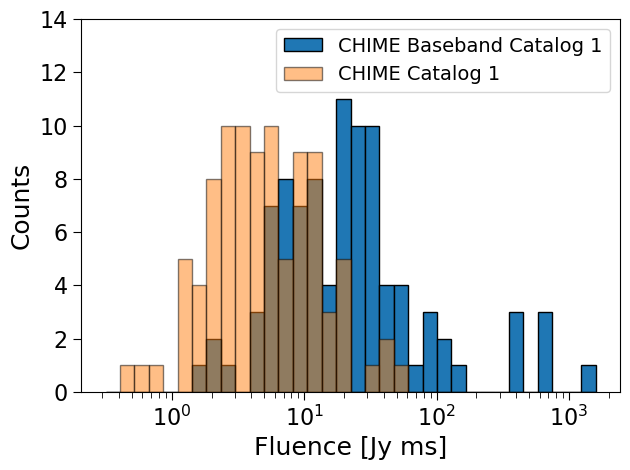

In [4]:
fig, ax = plt.subplots(1,1)
ax.hist(cat2['fluence'][cat2_idx], bins=np.logspace(-0.5,3.2,35), label='CHIME Baseband Catalog 1', edgecolor='k')
ax.hist(cat1['fluence'][cat1_idx], bins=np.logspace(-0.5,3.2,35), alpha=0.5, label='CHIME Catalog 1', edgecolor='k')
ax.set_xscale('log')
ax.set_ylabel("Counts", fontsize=18)
ax.set_xlabel("Fluence [Jy ms]", fontsize=18)
ax.tick_params(axis='both', which='major', length=6, labelsize=16)
ax.tick_params(axis='both', which='minor', length=4)
ax.set_ylim([0,14])
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

### Generate Figure 9 in Gupta et al. (2025)

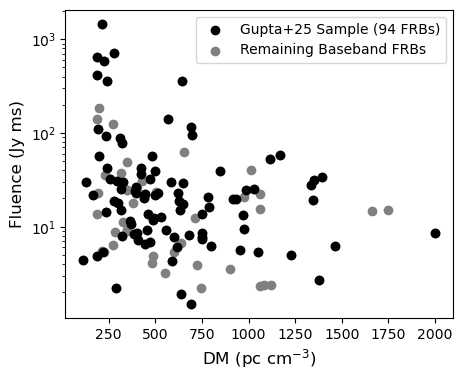

In [5]:
plt.figure(figsize=(5,4))
plt.scatter(cat2['dm'], cat2['fluence'], color='gray', label='Remaining Baseband FRBs')
plt.scatter(dms_cat2, fluences, color='k', label="Gupta+25 Sample (94 FRBs)")
plt.yscale('log')
plt.xlabel('DM (pc cm$^{-3}$)', fontsize=12)
plt.ylabel('Fluence (Jy ms)', fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1])
plt.show()

### Show that even baseband SNR vs fluence has a very strong scatter, even if they are slightly correlated

In [6]:
from scipy.optimize import minimize

def linefit(x, m, c):
    return m*x + c

def log_likelihood(theta, x, y):
    m, c, log_f = theta
    model = linefit(x, m, c)
    residual = model - y
    sigma2 = model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

nll = lambda *args: -log_likelihood(*args)
initial = np.array([1.0, 0.1, np.log10(0.99)])
popt = minimize(nll, initial, args=(np.log10(cat1['snr_fitb'][cat1_idx].values), np.log10(cat2['fluence'][cat2_idx].values)))
print(popt.x[0:2])

[ 0.98263361 -0.22678966]


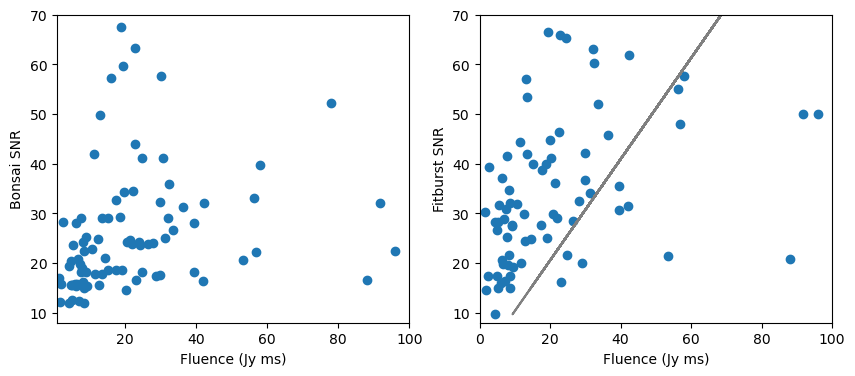

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].scatter(cat2['fluence'][cat2_idx], cat1['bonsai_snr'][cat1_idx])
ax[0].set_ylabel("Bonsai SNR")
ax[0].set_xlabel("Fluence (Jy ms)")
ax[0].set_xlim([1,100])
ax[0].set_ylim([8,70])
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')

ax[1].scatter(cat2['fluence'][cat2_idx], cat1['snr_fitb'][cat1_idx])
ax[1].plot(linefit(cat1['snr_fitb'][cat1_idx], *popt.x[0:2]), cat1['snr_fitb'][cat1_idx], color='gray')
ax[1].set_ylabel("Fitburst SNR")
ax[1].set_xlabel("Fluence (Jy ms)")
ax[1].set_xlim([0,100])
ax[1].set_ylim([8,70])

plt.show()

### Analysis of CHIME Baseband-selection-cut FRB observables to compare with Shin et al. (2023) results
#### We will see that SNR is not a useful quantity.

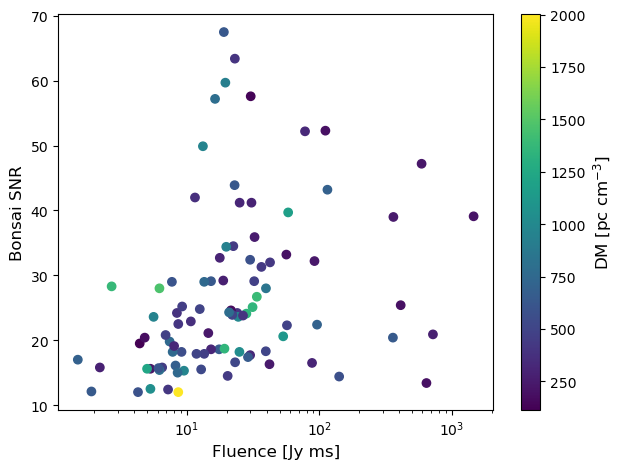

In [8]:
snrs = cat1['bonsai_snr'][cat1_idx].values

fig, ax = plt.subplots(1)
map = ax.scatter(fluences, snrs, c=dms_cat2, cmap='viridis')
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('DM [pc cm$^{-3}$]', fontsize=12)
plt.xlabel('Fluence [Jy ms]', fontsize=12)
plt.ylabel('Bonsai SNR', fontsize=12)
plt.xscale('log')
plt.tight_layout()
plt.show()

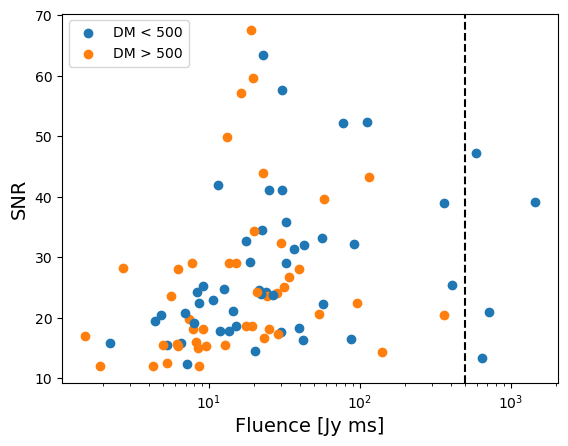

In [7]:
snrs = cat1['bonsai_snr'][cat1_idx].values
for i in range(len(snrs)):
    if dms_cat2[i] < 500:
        l1 = plt.scatter(fluences[i], snrs[i], color='C0', label='DM < 500')
    else:
        l2 = plt.scatter(fluences[i], snrs[i], color='C1', label='DM > 500')

plt.axvline(500, color='k', linestyle='--')
# plt.axhline(50, color='k', linestyle='--')
plt.xlabel('Fluence [Jy ms]', fontsize=14)
plt.ylabel('SNR', fontsize=14)
plt.xscale('log')
plt.legend(handles = [l1, l2])
plt.show()

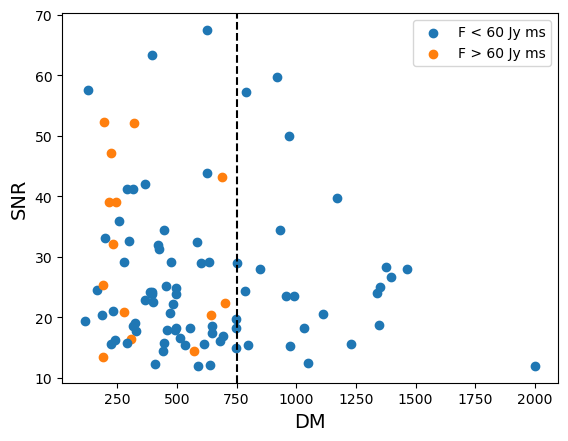

In [8]:
for i in range(len(snrs)):
    if fluences[i] < 60:
        l1 = plt.scatter(dms_cat2[i], snrs[i], color='C0', label='F < 60 Jy ms')
    else:
        l2 = plt.scatter(dms_cat2[i], snrs[i], color='C1', label='F > 60 Jy ms')
plt.axvline(750, color='k', linestyle='--')
plt.xlabel('DM', fontsize=14)
plt.ylabel('SNR', fontsize=14)
# plt.xscale('log')
plt.legend(handles = [l1, l2])
plt.show()

### Comparison of DM and fluence information with ASKAP bursts (Shannon+2018, Lu & Piro 2019)

In [9]:
askap = pd.read_csv('files/askap.csv')
askap_dm = askap['DM'].values
askap_fluence = askap['Fluence'].values
print(askap_dm.shape, askap_fluence.shape)

(20,) (20,)


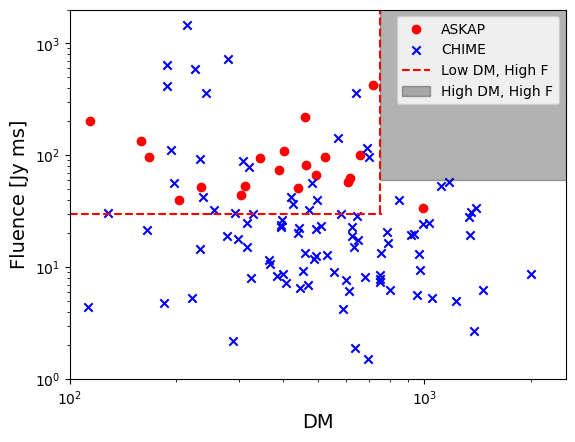

In [10]:
from matplotlib.patches import Rectangle as rect
plt.scatter(askap_dm, askap_fluence, marker='o', color='red', label='ASKAP')
plt.scatter(dms_cat2, fluences, marker='x', color='blue', label='CHIME')
plt.axhline(30, xmax=0.63, color='red', linestyle='--')
plt.axvline(750, ymin=0.45, color='red', linestyle='--', label='Low DM, High F')
plt.gca().add_patch(rect((750, 60), 2000, 3000, color='black', alpha=0.3, label='High DM, High F'))
plt.xlabel('DM', fontsize=14)
plt.ylabel('Fluence [Jy ms]', fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.xlim([100, 2500])
plt.ylim([1, 2000])
plt.legend()
plt.show()